Data Analysis - Predicting Hiring Decisions in Recruitment Data

Citation

Rabie El Kharoua. (2024). 💼 Predicting Hiring Decisions in Recruitment Data [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8715385

In [41]:
! pip install pandas numpy seaborn matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for all plots
sns.set_style("whitegrid")

In [43]:
# Create a DataFrame from the hiring data
df = pd.read_csv("data/recruitment_data.csv")
df.head(7)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
5,27,0,3,14,4,31.706659,54,50,50,1,1
6,48,0,2,6,1,17.291229,24,52,64,3,0


In [44]:
df.shape

(1500, 11)

In [45]:
# Checking dataset dimensions:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  1500
Number of columns:  11


In [46]:
# Print all column names
print("Column names: ", df.columns)

Column names:  Index(['Age', 'Gender', 'EducationLevel', 'ExperienceYears',
       'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore',
       'SkillScore', 'PersonalityScore', 'RecruitmentStrategy',
       'HiringDecision'],
      dtype='object')


In [47]:
# Describe the EducationLevel column
df["EducationLevel"].describe()

count    1500.000000
mean        2.188000
std         0.862449
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: EducationLevel, dtype: float64

In [48]:
# Show the distribution of the HiringDecision column
hiring_decision_distribution = df["HiringDecision"].value_counts()
hiring_decision_distribution

HiringDecision
0    1035
1     465
Name: count, dtype: int64

C:\Users\carlt\AppData\Local\Temp\ipykernel_22728\2368773570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="RdYlGn")


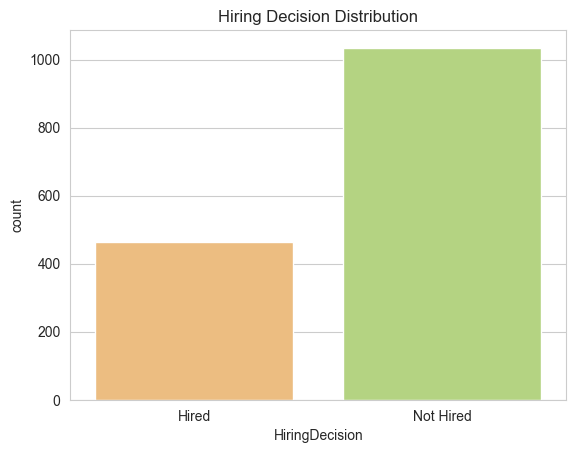

In [49]:
# Plot the distribution of the HiringDecision column
def plot_distribution(df, column, title):
    # Let 0 be 'Not Hired' and 1 be 'Hired'
    df['HiringDecision'] = df['HiringDecision'].map({0: 'Not Hired', 1: 'Hired'})
    sns.countplot(x=column, data=df, palette="RdYlGn")
    plt.title(title)
    plt.show()

plot_distribution(df, 'HiringDecision', 'Hiring Decision Distribution')

C:\Users\carlt\AppData\Local\Temp\ipykernel_22728\1752522173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].map({0:'Male',1:'Female'})


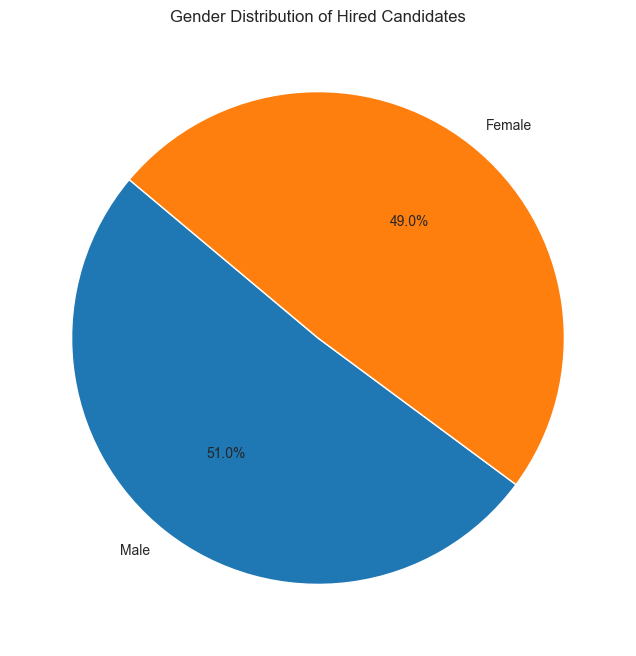

In [50]:
# Create a pie chart that shows the Gender distribution only of those who were hired
hired = df[df["HiringDecision"] == 'Hired']
hired.head()

def plot_pie_chart(df, column, title):
    plt.figure(figsize=(8, 8))
    # Show 0 as 'Male' and 1 as 'Female'
    df[column] = df[column].map({0:'Male',1:'Female'})
    plt.pie(df[column].value_counts(), labels=df[column].value_counts().index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

plot_pie_chart(hired,'Gender','Gender Distribution of Hired Candidates')

In [51]:
hired

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,Female,2,0,3,26.783828,48,78,91,1,Hired
1,39,Female,4,12,3,25.862694,35,68,80,2,Hired
5,27,Male,3,14,4,31.706659,54,50,50,1,Hired
8,26,Female,3,6,5,28.774864,80,78,51,1,Hired
12,30,Male,3,12,5,5.213218,96,46,78,3,Hired
...,...,...,...,...,...,...,...,...,...,...,...
1489,23,Male,2,0,4,21.290605,82,15,41,2,Hired
1495,48,Male,2,3,4,9.183783,66,3,80,3,Hired
1497,24,Female,1,1,2,4.289911,31,91,58,1,Hired
1498,48,Male,2,4,4,36.299263,9,37,44,2,Hired


C:\Users\carlt\AppData\Local\Temp\ipykernel_22728\3218060269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].map({1:"Bachelor's (Type 1)", 2:"Bachelor's (Type 2)", 3:"Master's", 4:"PhD"})


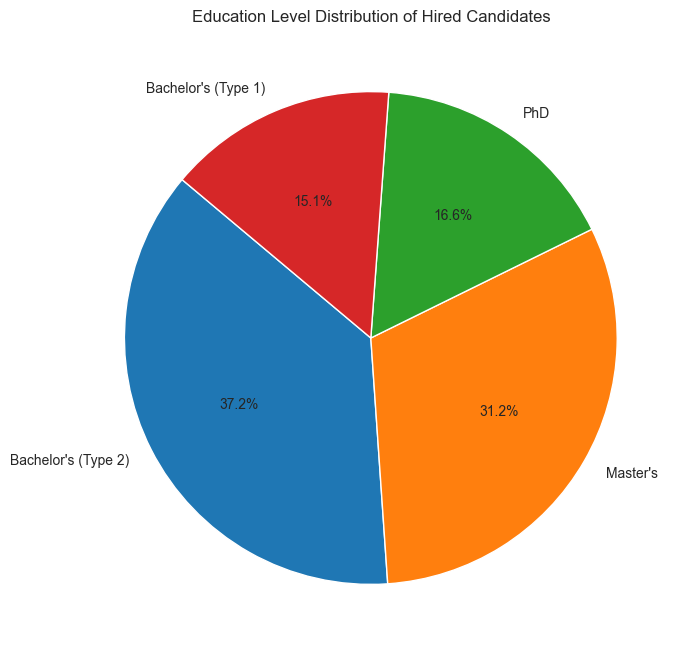

In [52]:
def plot_pie_chart(df, column, title):
    plt.figure(figsize=(8, 8))
    # Show 1 as 'Bachelor's (Type 1)', 2 as 'Bachelor's (Type 2)', 3 as 'Master's', and 4 as 'PhD'
    df[column] = df[column].map({1:"Bachelor's (Type 1)", 2:"Bachelor's (Type 2)", 3:"Master's", 4:"PhD"})
    plt.pie(df[column].value_counts(), labels=df[column].value_counts().index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

plot_pie_chart(hired,'EducationLevel','Education Level Distribution of Hired Candidates')


In [53]:
# Install sklearn
! pip install -U scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
# Make predictions with a k-NN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [55]:
#Feature variables
X = df.drop(['HiringDecision'], axis=1)
#Target variable
y = df['HiringDecision']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [58]:
y_pred = knn.predict(X_test)
# Step 7: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

       Hired       0.48      0.38      0.42        85
   Not Hired       0.77      0.84      0.81       215

    accuracy                           0.71       300
   macro avg       0.63      0.61      0.62       300
weighted avg       0.69      0.71      0.70       300



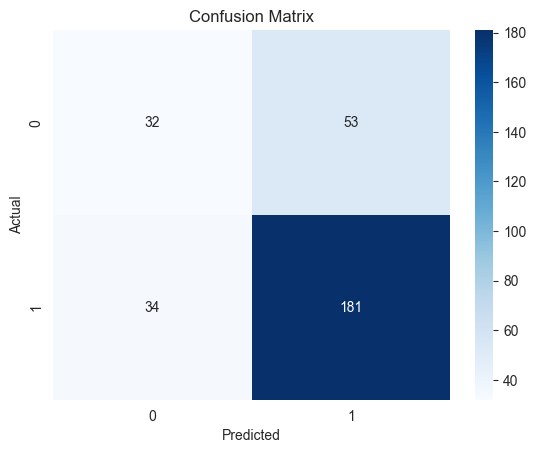

In [59]:
# show confusion matrix in a visualizaion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
